In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
booking = pd.read_csv("booking.csv")

# Print a summary of the DataFrame
print(booking.head())


  Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price  \

In [3]:
print(booking.describe())

       number of adults  number of children  number of weekend nights  \
count      36285.000000        36285.000000              36285.000000   
mean           1.844839            0.105360                  0.810693   
std            0.518813            0.402704                  0.870590   
min            0.000000            0.000000                  0.000000   
25%            2.000000            0.000000                  0.000000   
50%            2.000000            0.000000                  1.000000   
75%            2.000000            0.000000                  2.000000   
max            4.000000           10.000000                  7.000000   

       number of week nights  car parking space     lead time      repeated  \
count           36285.000000       36285.000000  36285.000000  36285.000000   
mean                2.204602           0.030977     85.239851      0.025630   
std                 1.410946           0.173258     85.938796      0.158032   
min                 0.0000

In [4]:
print(booking.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

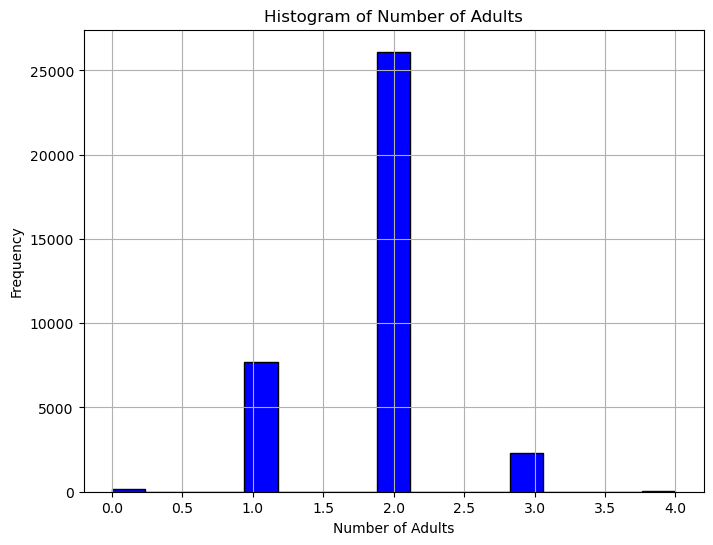

In [5]:
# Plotting histogram of number of adults
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size

plt.hist(booking['number of adults'], bins='auto', color='blue', edgecolor='black')  # Automatically determine bins
plt.xlabel('Number of Adults')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Adults')
plt.grid(True)
plt.show()

In this simple observation, we can see that the majority of bookings were made for two adults and fewer for a single person.

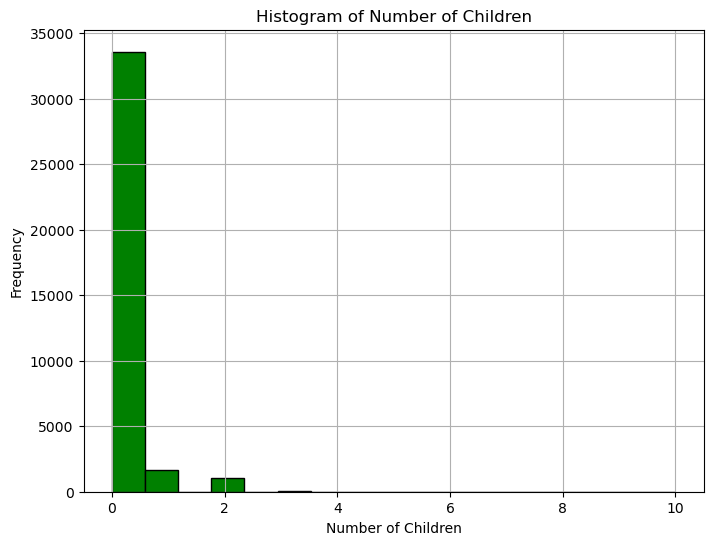

In [7]:
# Plotting histogram of number of children
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size

plt.hist(booking['number of children'], bins='auto', color='green', edgecolor='black')  # Automatically determine bins
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Children')
plt.grid(True)
plt.show()

Children are rare in this place, which attracts many people who don't like the extra noise and disturbance that children can cause. It's a great advertising tool.

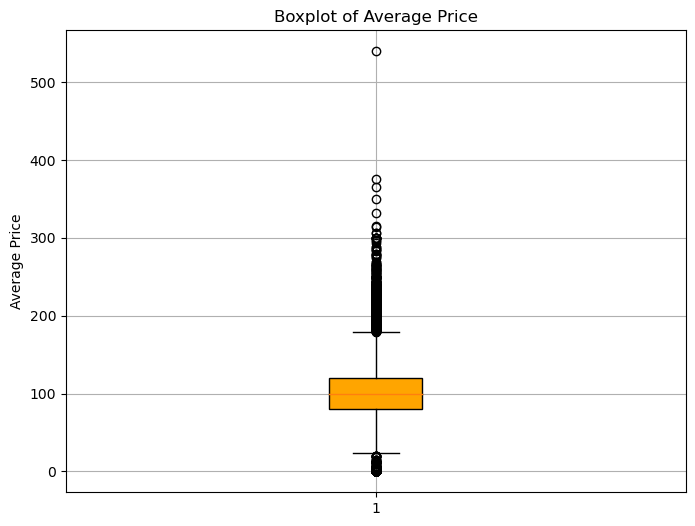

In [9]:
# Plotting boxplot of average price
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size

plt.boxplot(booking['average price'], patch_artist=True, boxprops=dict(facecolor='orange'))  # Creating boxplot with orange fill color
plt.ylabel('Average Price')
plt.title('Boxplot of Average Price')
plt.grid(True)
plt.show()

Here we can see the average price is in 100 dollars range, but there is a good group of bookings that range in between 180$-380$, probably dew to calendar events such as Christmas,Spring brake, Valentine's Day etc. ,that drive up the price.

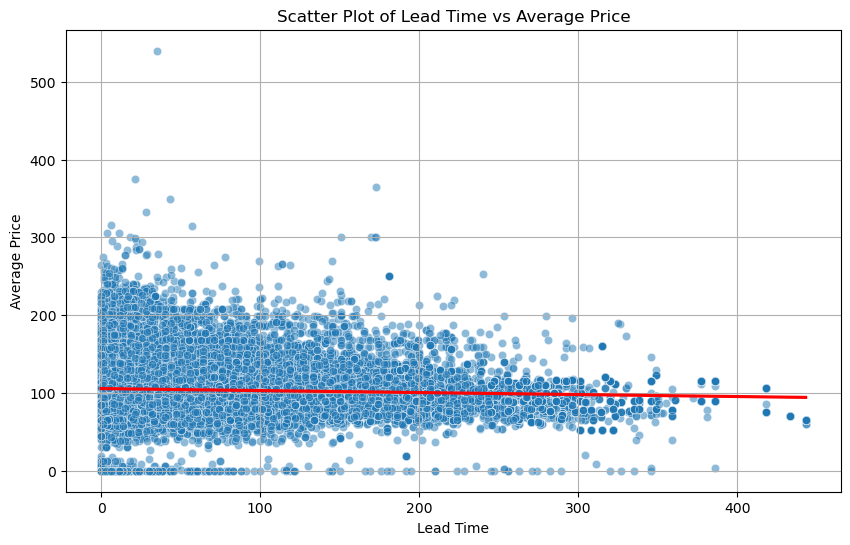

In [11]:
# Plotting scatter plot of lead time vs average price
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size

# Scatter plot
sns.scatterplot(data=booking, x='lead time', y='average price', alpha=0.5)

# Adding regression line
sns.regplot(data=booking, x='lead time', y='average price', scatter=False, color='red')

plt.xlabel('Lead Time')
plt.ylabel('Average Price')
plt.title('Scatter Plot of Lead Time vs Average Price')
plt.grid(True)
plt.show()

We can see a strong pattern here, where the price tag and amount of bookings are decreasing with increase lead time.

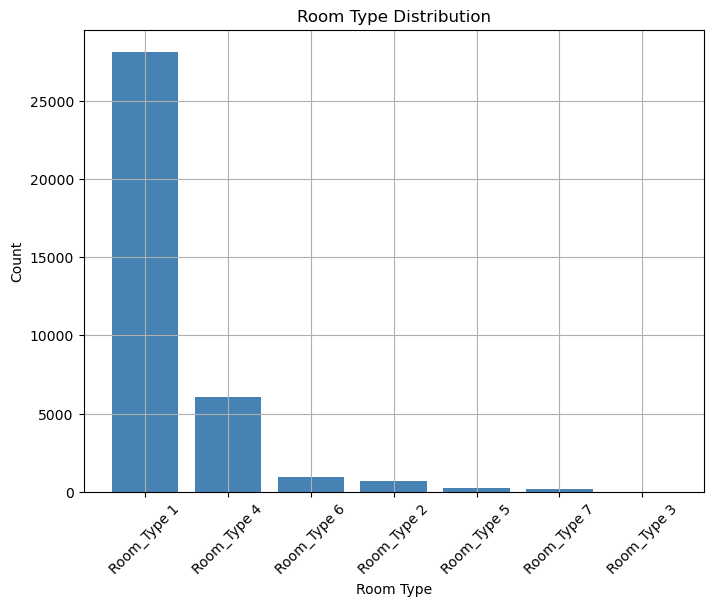

Table of Room Type Counts:
room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64


In [13]:
# Compute counts of each room type
room_type_counts = booking['room type'].value_counts()

# Plotting bar plot of room type distribution
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size

plt.bar(room_type_counts.index, room_type_counts.values, color='steelblue')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Room Type Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(True)
plt.show()

# Display table of room type counts
print("Table of Room Type Counts:")
print(room_type_counts)

Room type one is dominating the bookings with  28138 instances.

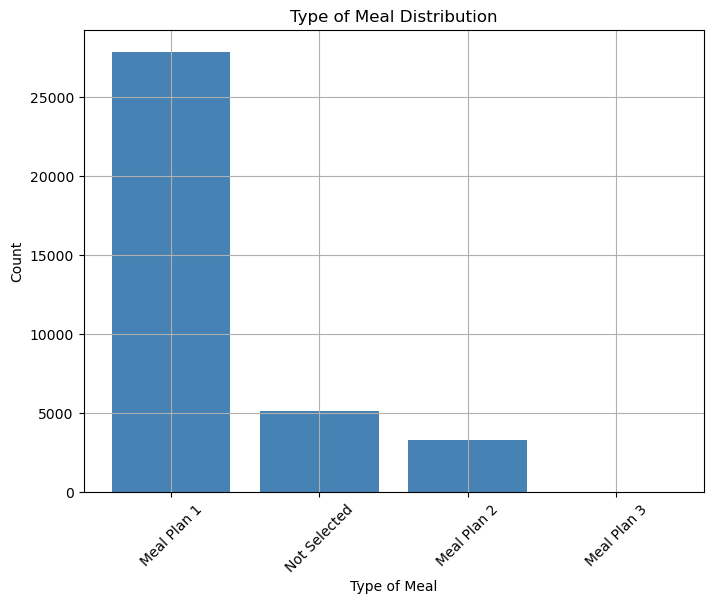

Table of Type of Meal Counts:
type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64


In [15]:
# Compute counts of each type of meal
meal_type_counts = booking['type of meal'].value_counts()

# Plotting bar plot of type of meal distribution
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size

plt.bar(meal_type_counts.index, meal_type_counts.values, color='steelblue')
plt.xlabel('Type of Meal')
plt.ylabel('Count')
plt.title('Type of Meal Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(True)
plt.show()

# Display table of type of meal counts
print("Table of Type of Meal Counts:")
print(meal_type_counts)

Meal plan 1 does the the same with 27842, and Meal plan 3 needs to be dropped from the Menu.

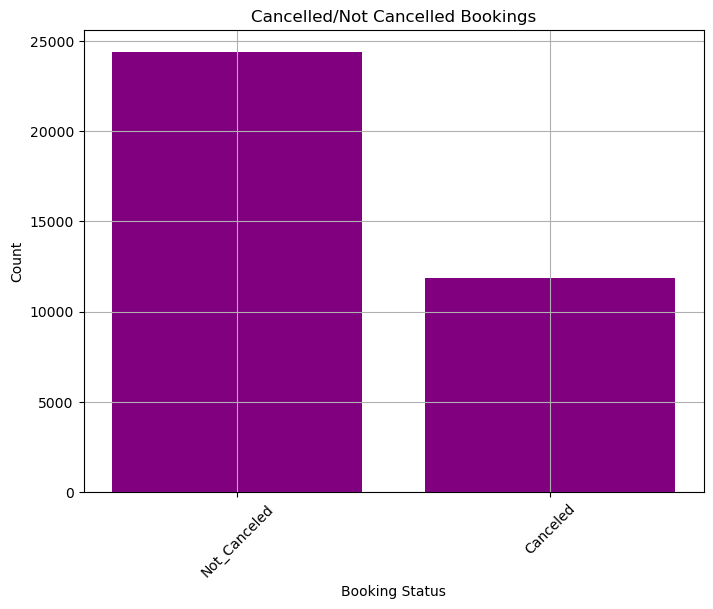

Table of Booking Status Counts:
booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64


In [17]:
# Compute counts of cancelled and not cancelled bookings
booking_status_counts = booking['booking status'].value_counts()

# Plotting bar plot of booking status distribution
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size

plt.bar(booking_status_counts.index, booking_status_counts.values, color='purple')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.title('Cancelled/Not Cancelled Bookings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(True)
plt.show()

# Display table of booking status counts
print("Table of Booking Status Counts:")
print(booking_status_counts)

   Here we can see that  almost 30% of bookings were cancelled, so the Hotel management has to work on a strategy of keeping the clients (One of the top problems in the Hotel business!), and reduce that amount to earn more business!In two years  11889 bookings were cancelled at an average price of 100$, that's 1,188,900$ of lost revenue. And that's what we are going to do with our next step.
   For this problem, we are going to implement one of the top tools in the business: XGBoost. The 'Golden Egg' here is the predicted probabilities for the cancellation list!
    


In [19]:
print(booking.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [20]:
# Remove the date and Booking_ID columns
booking = booking.drop(columns=['date of reservation', 'Booking_ID'])

# Convert booking.status to numeric (1 for 'Canceled', 0 for 'Not_Canceled')
booking['booking status'] = booking['booking status'].apply(lambda x: 1 if x == 'Canceled' else 0)

# Convert categorical variables to dummy variables
categorical_features = ['room type', 'type of meal', 'market segment type']
booking = pd.get_dummies(booking, columns=categorical_features)

# Split dataset into training and test sets
train_Data, test_Data = train_test_split(booking, test_size=0.2, random_state=123)

# Define X and y for training
X_train = train_Data.drop(columns=['booking status'])
y_train = train_Data['booking status']

X_test = test_Data.drop(columns=['booking status'])
y_test = test_Data['booking status']

# XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',   # using AUC as the evaluation metric
    'max_depth': 6,         # maximum depth of trees
    'eta': 0.1,             # learning rate
    'subsample': 0.8,       # subsample ratio of training instances
    'colsample_bytree': 0.8 # subsample ratio of columns when constructing each tree
}

# Number of boosting rounds
num_rounds = 1000

# Create DMatrix objects for XGBoost
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# Train the XGBoost model
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=num_rounds,
    evals=[(dtrain, 'train'), (dtest, 'eval')],
    early_stopping_rounds=10,   # Stops if no improvement after 10 rounds
    verbose_eval=True            # Print evaluation results
)

[0]	train-auc:0.89517	eval-auc:0.89061
[1]	train-auc:0.90150	eval-auc:0.89696
[2]	train-auc:0.90246	eval-auc:0.89795
[3]	train-auc:0.90635	eval-auc:0.90305
[4]	train-auc:0.90902	eval-auc:0.90607
[5]	train-auc:0.91013	eval-auc:0.90703
[6]	train-auc:0.91107	eval-auc:0.90777
[7]	train-auc:0.91384	eval-auc:0.90961
[8]	train-auc:0.91369	eval-auc:0.90876
[9]	train-auc:0.91419	eval-auc:0.90971
[10]	train-auc:0.91513	eval-auc:0.91090
[11]	train-auc:0.91615	eval-auc:0.91206
[12]	train-auc:0.91669	eval-auc:0.91248
[13]	train-auc:0.91797	eval-auc:0.91327
[14]	train-auc:0.91877	eval-auc:0.91425
[15]	train-auc:0.92025	eval-auc:0.91558
[16]	train-auc:0.92078	eval-auc:0.91559
[17]	train-auc:0.92139	eval-auc:0.91619
[18]	train-auc:0.92159	eval-auc:0.91628
[19]	train-auc:0.92202	eval-auc:0.91656
[20]	train-auc:0.92236	eval-auc:0.91698
[21]	train-auc:0.92349	eval-auc:0.91817
[22]	train-auc:0.92410	eval-auc:0.91847
[23]	train-auc:0.92498	eval-auc:0.91942
[24]	train-auc:0.92510	eval-auc:0.91977
[25]	train

In [21]:
import numpy as np
xgb_pred_probs = xgb_model.predict(dtest)

# Predicted classification based on a probability threshold of 0.5
xgb_pred_classes = np.where(xgb_pred_probs > 0.5, 1, 0)

# Create a confusion matrix to evaluate the predictions
xgb_conf_matrix = confusion_matrix(test_Data['booking status'], xgb_pred_classes, labels=[0, 1])

# Calculate accuracy from the confusion matrix
xgb_accuracy = accuracy_score(test_Data['booking status'], xgb_pred_classes)

# Print the confusion matrix and accuracy
print("Confusion Matrix:")
print(xgb_conf_matrix)
print("Accuracy:", xgb_accuracy)

Confusion Matrix:
[[4559  341]
 [ 536 1821]]
Accuracy: 0.8791511643929999


The F1 score is approximately 0.805

In [23]:
print(xgb_pred_probs)

[0.00247237 0.17294268 0.96630067 ... 0.99827874 0.00677301 0.6428348 ]


In [57]:
#pip install catboost

In [25]:
from catboost import CatBoostClassifier

In [37]:
# Initialize CatBoostClassifier
cat_model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, eval_metric='AUC', random_seed=123, verbose=100)

# Train the model
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10)

# Making predictions on the test data
cat_pred_probs = cat_model.predict_proba(X_test)[:, 1]

# Predicted classification based on a probability threshold of 0.5
cat_pred_classes = (cat_pred_probs > 0.5).astype(int)

# Create a confusion matrix to evaluate the predictions
conf_matrix = confusion_matrix(y_test, cat_pred_classes)

# Calculate accuracy from the confusion matrix
cat_accuracy = accuracy_score(y_test, cat_pred_classes)

# Print the confusion matrix and accuracy
print(conf_matrix)
print(f"Accuracy: {cat_accuracy:.2f}")

0:	test: 0.8593634	best: 0.8593634 (0)	total: 5.86ms	remaining: 5.85s
100:	test: 0.9186988	best: 0.9186988 (100)	total: 596ms	remaining: 5.3s
200:	test: 0.9296794	best: 0.9296794 (200)	total: 1.2s	remaining: 4.75s
300:	test: 0.9333232	best: 0.9333232 (300)	total: 1.82s	remaining: 4.23s
400:	test: 0.9352438	best: 0.9352438 (400)	total: 2.39s	remaining: 3.58s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.935247331
bestIteration = 404

Shrink model to first 405 iterations.
[[4549  351]
 [ 580 1777]]
Accuracy: 0.87


 F1 score is approximately 0.793

In [40]:
cat_pred_probs

array([0.00301434, 0.20163667, 0.96476159, ..., 0.99200752, 0.02055071,
       0.71423193])

XGBoost slightly outperformed CatBoost, so I will preceed with XGBoost

In [59]:
#pd.set_option('display.max_rows', None)  # to display all rows in the DataFrame
#xgb_pred_probs_df = pd.DataFrame(xgb_pred_probs, columns=['Prediction Probability'])
#display(xgb_pred_probs_df)

In [45]:
booking = pd.read_csv("booking.csv")

In [47]:
# Convert categorical variables to dummy variables if not already done
categorical_features = ['room type', 'type of meal', 'market segment type']
booking = pd.get_dummies(booking, columns=categorical_features)

# Drop unnecessary columns if not already dropped
booking = booking.drop(columns=['date of reservation'])

# Prepare the data for prediction
X_booking = booking.drop(columns=['Booking_ID', 'booking status'])  # Features for prediction

# Convert to DMatrix for XGBoost prediction
dbooking = xgb.DMatrix(data=X_booking)

# Predict probabilities for cancellation
probabilities = xgb_model.predict(dbooking)

# Create a DataFrame with Booking_ID and Probabilities
prob_df = pd.DataFrame({
    'Booking_ID': booking['Booking_ID'],  # Assuming 'Booking_ID' column still exists in 'booking'
    'Cancellation_Probability': probabilities
})

# Merge probabilities back into original booking DataFrame based on Booking_ID
booking_with_probs = pd.merge(booking, prob_df, on='Booking_ID')

# Print the DataFrame with probabilities
print(booking_with_probs)

      Booking_ID  number of adults  number of children  \
0       INN00001                 1                   1   
1       INN00002                 1                   0   
2       INN00003                 2                   1   
3       INN00004                 1                   0   
4       INN00005                 1                   0   
...          ...               ...                 ...   
36280   INN36282                 2                   0   
36281   INN36283                 2                   0   
36282   INN36284                 2                   0   
36283   INN36285                 3                   0   
36284   INN36286                 2                   0   

       number of weekend nights  number of week nights  car parking space  \
0                             2                      5                  0   
1                             1                      3                  0   
2                             1                      3                  

Now we have the probability of cancellation number for all bookings, based on this data the next step is to build an App that will predict the probability of cancellation in real time with new data entered...that will give the marketing and budgeting/planning departments information on the next steps.

In [55]:
#pip install dash

In [53]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import pandas as pd
import xgboost as xgb

# Load your trained XGBoost model
# Replace with your actual path to the model
xgb_model = xgb.Booster()
xgb_model.load_model('path_to_your_xgboost_model.model')

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Booking Cancellation Probability Predictor"),
    dcc.Upload(
        id='upload-data',
        children=html.Div([
            'Drag and Drop or ',
            html.A('Select Files')
        ]),
        style={
            'width': '100%',
            'height': '60px',
            'lineHeight': '60px',
            'borderWidth': '1px',
            'borderStyle': 'dashed',
            'borderRadius': '5px',
            'textAlign': 'center',
            'margin': '10px'
        },
        multiple=False
    ),
    html.Div(id='output-data-upload'),
])

# Callback to process uploaded file and display results
@app.callback(
    Output('output-data-upload', 'children'),
    [Input('upload-data', 'contents')],
    [State('upload-data', 'filename')]
)
def update_output(contents, filename):
    if contents is not None:
        # Read and process the uploaded CSV file
        content_type, content_string = contents.split(',')
        decoded = base64.b64decode(content_string)
        df = pd.read_csv(io.StringIO(decoded.decode('utf-8')))
        
        # Perform any necessary preprocessing (similar to what you did before)
        # e.g., handle categorical variables, drop unnecessary columns, etc.

        # Convert categorical variables to dummy variables
        categorical_features = ['room type', 'type of meal', 'market segment type']
        df = pd.get_dummies(df, columns=categorical_features)

        # Drop unnecessary columns if needed
        df = df.drop(columns=['date of reservation', 'Booking_ID'])

        # Convert to DMatrix for XGBoost prediction
        dmatrix = xgb.DMatrix(data=df)

        # Predict probabilities using XGBoost model
        probabilities = xgb_model.predict(dmatrix)

        # Add probabilities to the DataFrame
        df['Cancellation_Probability'] = probabilities

        # Display results (you can customize the output as needed)
        return html.Div([
            html.H5(f'Processed file: {filename}'),
            html.Table([
                html.Thead(html.Tr([html.Th(col) for col in df.columns])),
                html.Tbody([
                    html.Tr([
                        html.Td(df.iloc[i][col]) for col in df.columns
                    ]) for i in range(min(len(df), 10))  # Displaying first 10 rows for example
                ])
            ])
        ])

    else:
        return html.Div(['Drag and drop or select a CSV file to upload.'])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

/tmp/ipykernel_1563/933829346.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/tmp/ipykernel_1563/933829346.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


XGBoostError: [20:47:39] /workspace/dmlc-core/src/io/local_filesys.cc:209: Check failed: allow_null:  LocalFileSystem::Open "path_to_your_xgboost_model.model": No such file or directory
Stack trace:
  [bt] (0) /home/436f7d32-4ddd-4eaf-9720-55ccdc61e18a/.local/lib/python3.11/site-packages/xgboost/lib/libxgboost.so(+0x1ba24e) [0x7fcf9001524e]
  [bt] (1) /home/436f7d32-4ddd-4eaf-9720-55ccdc61e18a/.local/lib/python3.11/site-packages/xgboost/lib/libxgboost.so(+0xcc9637) [0x7fcf90b24637]
  [bt] (2) /home/436f7d32-4ddd-4eaf-9720-55ccdc61e18a/.local/lib/python3.11/site-packages/xgboost/lib/libxgboost.so(+0xcb54ce) [0x7fcf90b104ce]
  [bt] (3) /home/436f7d32-4ddd-4eaf-9720-55ccdc61e18a/.local/lib/python3.11/site-packages/xgboost/lib/libxgboost.so(XGBoosterLoadModel+0x18e) [0x7fcf8ffc9ace]
  [bt] (4) /opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/lib-dynload/../../libffi.so.8(+0xa052) [0x7fcffe305052]
  [bt] (5) /opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/lib-dynload/../../libffi.so.8(+0x8925) [0x7fcffe303925]
  [bt] (6) /opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/lib-dynload/../../libffi.so.8(ffi_call+0xde) [0x7fcffe30406e]
  [bt] (7) /opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/lib-dynload/_ctypes.cpython-311-x86_64-linux-gnu.so(+0x92e4) [0x7fcffe3152e4]
  [bt] (8) /opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/lib-dynload/_ctypes.cpython-311-x86_64-linux-gnu.so(+0x8836) [0x7fcffe314836]

